In [1]:
import numpy as np
import os
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf
import tensorflow as tf


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
BASE_PATH = '/tmp/fisrt_dqn_test/'  # @param

In [10]:
# @title Load the configuration for DQN.
DQN_PATH = os.path.join(BASE_PATH, 'dqn3')
# Modified from dopamine/agents/dqn/config/dqn_cartpole.gin
dqn_config = """
# Hyperparameters for a simple DQN-style Cartpole agent. The hyperparameters
# chosen achieve reasonable performance.
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.agents.dqn.dqn_agent
import dopamine.replay_memory.circular_replay_buffer
import gin.tf.external_configurables
import diaspora_gym
import testConfiguration
import tensorflow


DQNAgent.observation_shape = (2,1)
DQNAgent.observation_dtype = %diaspora.OBSERVATION_DTYPE
DQNAgent.stack_size = 1
DQNAgent.network = @testConfiguration.diaspora_dqn_network
DQNAgent.gamma = 0.99
DQNAgent.update_horizon = 1
DQNAgent.min_replay_history = 500
DQNAgent.update_period = 4
DQNAgent.target_update_period = 100
DQNAgent.epsilon_fn = @dqn_agent.identity_epsilon
DQNAgent.tf_device = '/gpu:0'  # use '/cpu:*' for non-GPU version
DQNAgent.optimizer = @tf.train.AdamOptimizer()

tf.train.AdamOptimizer.learning_rate = 0.001
tf.train.AdamOptimizer.epsilon = 0.0003125

create_gym_environment.environment_name = 'diaspora'
create_gym_environment.version = 'v0'
create_agent.agent_name = 'dqn'
TrainRunner.create_environment_fn = @gym_lib.create_gym_environment
Runner.num_iterations = 50
Runner.training_steps = 100
Runner.evaluation_steps = 10
Runner.max_steps_per_episode = 200  # Default max episode length.

WrappedReplayBuffer.replay_capacity = 50000
WrappedReplayBuffer.batch_size = 128
"""
gin.parse_config(dqn_config, skip_unknown=False)

In [11]:
# @title Train DQN on Cartpole
dqn_runner = run_experiment.create_runner(DQN_PATH, schedule='continuous_train')
print('Will train DQN agent, please be patient, may be a while...')
dqn_runner.run_experiment()
print('Done training!')

INFO:tensorflow:Creating TrainRunner ...
INFO:tensorflow:Creating DQNAgent agent with the following parameters:
INFO:tensorflow:	 gamma: 0.990000
INFO:tensorflow:	 update_horizon: 1.000000
INFO:tensorflow:	 min_replay_history: 500
INFO:tensorflow:	 update_period: 4
INFO:tensorflow:	 target_update_period: 100
INFO:tensorflow:	 epsilon_train: 0.010000
INFO:tensorflow:	 epsilon_eval: 0.001000
INFO:tensorflow:	 epsilon_decay_period: 250000
INFO:tensorflow:	 tf_device: /gpu:0
INFO:tensorflow:	 use_staging: True
INFO:tensorflow:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7fbbc28c7a58>
INFO:tensorflow:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:tensorflow:	 observation_shape: (2, 1)
INFO:tensorflow:	 observation_dtype: <class 'numpy.float64'>
INFO:tensorflow:	 stack_size: 1
INFO:tensorflow:	 replay_capacity: 50000
INFO:tensorflow:	 batch_size: 128
INFO:tensorflow:	 update_horizon: 1
INFO:tensorflow:	 gamma: 0.990000
Will trai

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
INFO:tensorflow:Average undiscounted return per training episode: -11.60
INFO:tensorflow:Average training steps per second: 32.65
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
2
1
2
1
2
1
2
1
2
1
2
1
2
0
1
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0teps executed: 67 Episode length: 67 Return: -6.699999999999992
1
0
1
0
1
0
1
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
2
0
2
0
2
0
2
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
INFO:tensorflow:Average undiscounted return per training episode: -5.30
INFO:tensorflow:Average training steps per second: 13.51
1
1
1
1
1
1
1
1
1
1


2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
0
2
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
0teps executed: 99 Episode length: 45 Return: -4.5
1
0
1
0
1
0
1
1
2
1
2
1
2
1
2
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
1
1
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
2
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
INFO:tensorflow:Average undiscounted retu

1
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
INFO:tensorflow:Average undiscounted return per training episode: -9.90
INFO:tensorflow:Average training steps per second: 11.20
1
0
1
0
1
0
1
0
1
0
1
0
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
3
1
3
1
3
INFO:tensorflow:Average undiscounted return per training episode: -11.70
INFO:tensorflow:Average training steps per second: 86.62
1
2
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3

3
0
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
2
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
0
1
0
1
0
1
0
1
0
1
0
1
0
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
INFO:tensorflow:Average undiscounted return per training episode: -20.00
INFO:tensorflow:Average training steps per second: 24.03
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3


3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
INFO:tensorflow:Average undiscounted return per training episode: -20.00
INFO:tensorflow:Average training steps per second: 34.13
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1teps executed: 36 Episode length: 36 Return: -3.600000000000002
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
1
3
0teps executed: 87 Episode length: 51 Return: -5.099999999999998
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
INFO:tensorflow:Average undiscounted return per training episode: -3.87
INFO:tensorflow:Average training steps per second: 85.71
0
0
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
2
0

In [12]:
# @title Load the training logs.
data = colab_utils.read_experiment(DQN_PATH, verbose=True,
                                   summary_keys=['train_episode_returns'])
data['agent'] = 'DQN'
data['run'] = 1

Reading statistics from: /tmp/fisrt_dqn_test/dqn3//logs/log_49


/home/hec44/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


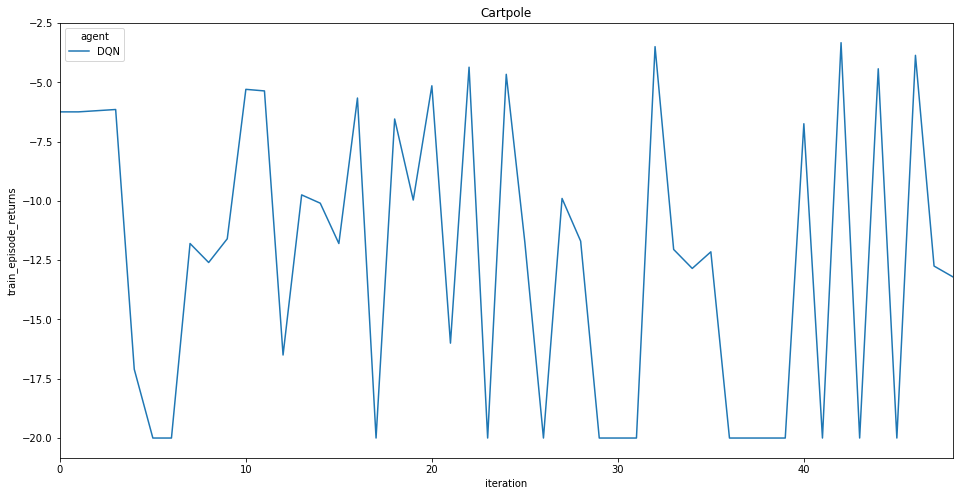

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=data, time='iteration', unit='run',
           condition='agent', value='train_episode_returns', ax=ax)
plt.title('Cartpole')
plt.show()